

<h1 align="center">
    NSDC Data Science Capsule Projects
</h1>

<h2 align="center">
    Project: SQL Basics for Epidemiological Research
</h2>

<h3 align="center">
    Name: Raushan Zhandayeva
</h3>


### **Project description**

**Dataset**
Our World in Data COVID-19 Dataset: This dataset provides comprehensive data on COVID-19 cases, deaths, testing, and vaccination worldwide.
- You can find the dataset on Kaggle: [Kaggle Link](https://www.kaggle.com/datasets/bolkonsky/covid19)



## Table of Contents
1. [Libraries and Database Setup](#libraries-and-database-setup)
2. [Loading the Dataset](#loading-the-dataset)
3. [Basic SQL Queries](#basic-sql-queries)
4. [Filtering Data](#filtering-data)
5. [Aggregating Data](#aggregating-data)
6. [Grouping Data](#grouping-data)
7. [Sorting Data](#sorting-data)
8. [Joining Tables](#joining-tables)
9. [Subqueries](#subqueries)
10. [Window Functions](#window-functions)
11. [Data Analysis and Visualization](#data-analysis-and-visualization)
12. [Closing Connection](#closing-connection)
13. [Summary of Basic SQL Commands](#summary-of-basic-sql-commands)


## Milestone 1: Importing Libraries and Dataset


In [1]:
# Importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Load the dataset
df = pd.read_csv('gdrive/My Drive/data projects/covid-19.csv')  # Update with the correct local path

# Display the first few rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## Milestone 2: Setting Up SQLite Database


In [3]:
# Create a connection to SQLite database
conn = sqlite3.connect('covid19.db')
cursor = conn.cursor()

# Convert DataFrame to SQL
df.to_sql('covid19_data', conn, if_exists='replace', index=False)

429435

## Milestone 3: Basic SQL Queries


In [4]:
# Write a query to generate all columns and limit the rows to 10
query_1 = "select * from covid19_data limit 10;"

# Write a query to select 'location', 'total_cases', and 'total_deaths' columns from the 'covid19_data' table and limit the result to 10 rows.
query_2 = "select location, total_cases, total_deaths from covid19_data limit 10;"

# Execute the queries
result_1 = pd.read_sql_query(query_1, conn)
result_2 = pd.read_sql_query(query_2, conn)

# Display results
print(result_1)
print(result_2)

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
5      AFG      Asia  Afghanistan  2020-01-10          0.0        0.0   
6      AFG      Asia  Afghanistan  2020-01-11          0.0        0.0   
7      AFG      Asia  Afghanistan  2020-01-12          0.0        0.0   
8      AFG      Asia  Afghanistan  2020-01-13          0.0        0.0   
9      AFG      Asia  Afghanistan  2020-01-14          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0       

## Milestone 4: Filtering Data


In [5]:
# Write a query to select all columns from the 'covid19_data' table where the 'location' is 'United States' and limit the result to 10 rows.
query_3 = "select * from covid19_data where location = 'United States' limit 10;"

# Write a query to select all columns from the 'covid19_data' table where the 'location' is 'United States' and 'new_cases' are greater than 10,000.
query_4 = "select * from covid19_data where location = 'United States' and new_cases > 10000;"

# Execute the queries
result_3 = pd.read_sql_query(query_3, conn)
result_4 = pd.read_sql_query(query_4, conn)

# Display results
print(result_3)
print(result_4)

  iso_code      continent       location        date  total_cases  new_cases  \
0      USA  North America  United States  2020-01-05          0.0        0.0   
1      USA  North America  United States  2020-01-06          0.0        0.0   
2      USA  North America  United States  2020-01-07          0.0        0.0   
3      USA  North America  United States  2020-01-08          0.0        0.0   
4      USA  North America  United States  2020-01-09          0.0        0.0   
5      USA  North America  United States  2020-01-10          0.0        0.0   
6      USA  North America  United States  2020-01-11          0.0        0.0   
7      USA  North America  United States  2020-01-12          0.0        0.0   
8      USA  North America  United States  2020-01-13          0.0        0.0   
9      USA  North America  United States  2020-01-14          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0       

## Milestone 5: Aggregating Data


In [6]:
# Using COUNT, SUM, AVG, MIN, MAX
# Write a query to count the total number of records in the 'covid19_data' table.
query_5 = "select count(*) from covid19_data;"

# Write a query to calculate the sum of 'total_cases' in the 'covid19_data' table.
query_6 = "select sum(total_cases) from covid19_data ;"

# Write a query to calculate the average of 'new_cases' in the 'covid19_data' table.
query_7 = "select avg(new_cases) from covid19_data;"

# Write a query to find the minimum value of 'total_deaths' in the 'covid19_data' table.
query_8 = "select min(total_deaths) from covid19_data;"

# Write a query to find the maximum value of 'total_deaths' in the 'covid19_data' table.
query_9 = "select max(total_deaths) from covid19_data;"

# Execute the queries
result_5 = pd.read_sql_query(query_5, conn)
result_6 = pd.read_sql_query(query_6, conn)
result_7 = pd.read_sql_query(query_7, conn)
result_8 = pd.read_sql_query(query_8, conn)
result_9 = pd.read_sql_query(query_9, conn)

# Display results
print(result_5)
print(result_6)
print(result_7)
print(result_8)
print(result_9)

   count(*)
0    429435
   sum(total_cases)
0      3.033057e+12
   avg(new_cases)
0     8017.359934
   min(total_deaths)
0                0.0
   max(total_deaths)
0          7057132.0


## Milestone 6: Grouping Data


In [7]:
# Write a query to calculate the average of 'new_cases' for each 'location' in the 'covid19_data' table, grouping the data by location.
query_10 = "select location, avg(new_cases) from covid19_data group by location;"

# Write a query to calculate the average of 'new_cases' for each 'location' in the 'covid19_data' table, grouping by location, and filtering the groups to only include those with an average of new cases greater than 1,000.
query_11 = "select location, avg(new_cases) from covid19_data group by location having avg(new_cases) >1000;"

# Execute the queries
result_10 = pd.read_sql_query(query_10, conn)
result_11 = pd.read_sql_query(query_11, conn)

# Display results
print(result_10)
print(result_11)

                         location  avg(new_cases)
0                          Africa     7853.543011
1                       Argentina     6034.180406
2                            Asia   180145.866189
3                       Australia     7085.520311
4                         Austria     3633.479092
..                            ...             ...
57                 United Kingdom    14919.133214
58                  United States    83958.465097
59  Upper-middle-income countries   150391.950418
60                        Vietnam     6943.847073
61                          World   463521.539427

[62 rows x 2 columns]


## Milestone 7: Sorting Data


In [9]:
# Write a query to select 'location' and 'total_cases' from the 'covid19_data' table, ordering the results by 'total_cases' in descending order and limiting the output to the top 10 rows.
query_12 = "select location, total_cases from covid19_data order by total_cases desc limit 10;"

# Execute the query
result_12 = pd.read_sql_query(query_12, conn)

# Display result
print(result_12)

  location  total_cases
0    World  775866783.0
1    World  775819614.0
2    World  775819614.0
3    World  775819614.0
4    World  775819614.0
5    World  775819614.0
6    World  775819614.0
7    World  775819614.0
8    World  775763598.0
9    World  775763598.0


## Milestone 8: SQL Joins - Combining Tables



In [19]:
# Assuming another table 'vaccination_data' exists
# Create a sample vaccination_data table
vaccination_data = {
    'location': ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom'],
    'total_vaccinations': [300000000, 250000000, 200000000, 150000000, 100000000]
}
vaccination_df = pd.DataFrame(vaccination_data)
vaccination_df.to_sql('vaccination_data', conn, if_exists='replace', index=False)

# Write a query to join 'covid19_data' and 'vaccination_data' tables, selecting 'location', 'total_cases', and 'total_vaccinations', using an INNER JOIN on the 'location' column.
query_13 = """
select covid19_data.location, covid19_data.total_cases, vaccination_data.total_vaccinations
FROM  covid19_data
INNER JOIN vaccination_data ON covid19_data.location = vaccination_data.location;"""

# Execute the query
result_13 = pd.read_sql_query(query_13, conn)

# Display result
print(result_13)

           location  total_cases  total_vaccinations
0            Brazil          0.0           200000000
1            Brazil          0.0           200000000
2            Brazil          0.0           200000000
3            Brazil          0.0           200000000
4            Brazil          0.0           200000000
...             ...          ...                 ...
8373  United States  103436829.0           300000000
8374  United States  103436829.0           300000000
8375  United States  103436829.0           300000000
8376  United States  103436829.0           300000000
8377  United States  103436829.0           300000000

[8378 rows x 3 columns]


## Milestone 9: Subqueries


In [20]:
# Using subquery in SELECT
# Write a query to select 'location' and 'total_cases' from the 'covid19_data' table and include the average of 'total_cases' as a subquery.

query_14 = """
SELECT location, total_cases,
       (SELECT avg(total_cases) FROM covid19_data) as average_total_cases
FROM covid19_data;
"""

# Execute the query
result_14 = pd.read_sql_query(query_14, conn)

# Display result
print(result_14)

           location  total_cases  average_total_cases
0       Afghanistan          0.0         7.365292e+06
1       Afghanistan          0.0         7.365292e+06
2       Afghanistan          0.0         7.365292e+06
3       Afghanistan          0.0         7.365292e+06
4       Afghanistan          0.0         7.365292e+06
...             ...          ...                  ...
429430     Zimbabwe     266386.0         7.365292e+06
429431     Zimbabwe     266386.0         7.365292e+06
429432     Zimbabwe     266386.0         7.365292e+06
429433     Zimbabwe     266386.0         7.365292e+06
429434     Zimbabwe     266386.0         7.365292e+06

[429435 rows x 3 columns]


## Milestone 10: Window Functions


In [22]:
# Using ROW_NUMBER(), RANK(), DENSE_RANK(), NTILE(), LEAD(), LAG()
# Write a query to select 'location', 'date', and 'new_cases' from the 'covid19_data' table. Use ROW_NUMBER(), RANK(), and DENSE_RANK() functions, partitioned by 'location', and ordered by 'date' and 'new_cases' respectively.
query_15 = """
SELECT location, date, new_cases,
       ROW_NUMBER() OVER(PARTITION BY location ORDER BY date) as num_row,
       RANK() OVER(PARTITION BY location ORDER BY new_cases DESC) as rank_num,
       DENSE_RANK() OVER(PARTITION BY location ORDER BY new_cases DESC) as dense_rank_num
FROM covid19_data;
"""

# Execute the query
result_15 = pd.read_sql_query(query_15, conn)

# Display result
print(result_15)

           location        date  new_cases  num_row  rank_num  dense_rank_num
0       Afghanistan  2020-01-05        0.0        1       219             203
1       Afghanistan  2020-01-06        0.0        2       219             203
2       Afghanistan  2020-01-07        0.0        3       219             203
3       Afghanistan  2020-01-08        0.0        4       219             203
4       Afghanistan  2020-01-09        0.0        5       219             203
...             ...         ...        ...      ...       ...             ...
429430     Zimbabwe  2024-07-31        0.0     1670       212             169
429431     Zimbabwe  2024-08-01        0.0     1671       212             169
429432     Zimbabwe  2024-08-02        0.0     1672       212             169
429433     Zimbabwe  2024-08-03        0.0     1673       212             169
429434     Zimbabwe  2024-08-04        0.0     1674       212             169

[429435 rows x 6 columns]


## Milestone 11: Data Analysis and Visualization

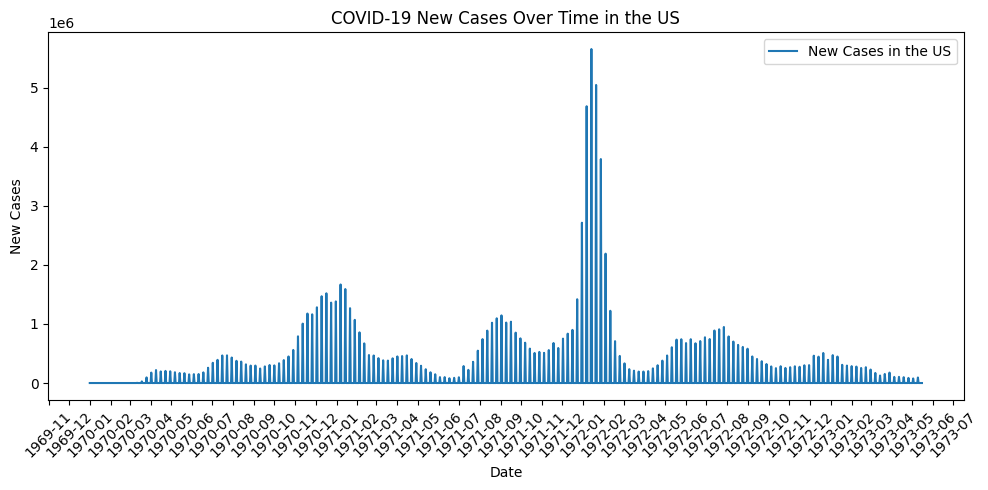

In [23]:
# Write a query to select 'date' and 'new_cases' from the 'covid19_data' table for records where the 'location' is 'United States'.
query_16 = "SELECT date, new_cases FROM covid19_data WHERE location='United States';"
us_data = pd.read_sql_query(query_16, conn)


# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(us_data['date'], us_data['new_cases'], label='New Cases in the US')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 New Cases Over Time in the US')
plt.legend()

# Format the x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
